## SVC Machine Learning

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = digits.target

In [6]:
X = df.drop('target',axis='columns')
y = df.target

In [9]:
#linear kernel
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
model.score(X_test, y_test)

0.9861111111111112

In [11]:
#kernel='rbf'
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9888888888888889

### SVC with kernel='rbf' is best accuracy

In [23]:
#kernel='rbf' C=1.1
model = SVC(kernel='rbf', C=1.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9888888888888889

In [24]:
#kernel='rbf' C=1.2
model = SVC(kernel='rbf', C=1.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9916666666666667

In [25]:
#kernel='rbf' C=10
model = SVC(kernel='rbf', C=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9916666666666667

### SVC with kernel='rbf'  and C=1.2 is best accuracy

In [28]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

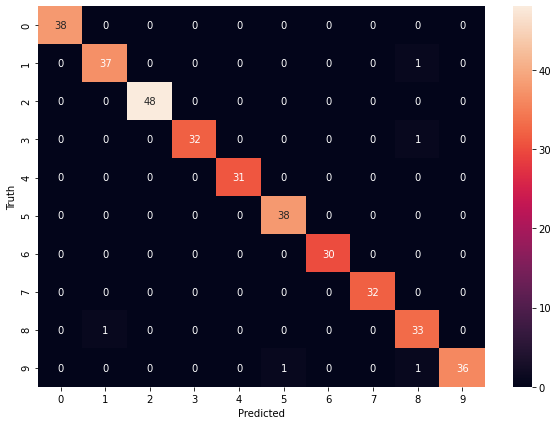

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')